In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('Titanic/train.csv', index_col='PassengerId')

In [6]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#making sex column binary
df['Sex'] = df['Sex'].apply(lambda x: 1 if x=='female' else 0)

In [9]:
#creating new column relatives
df['relatives']= df['SibSp'] + df['Parch']
df.drop(['SibSp','Parch'],axis = 1,inplace = True)

In [10]:
df['Age'].fillna(0,inplace=True)

In [11]:
y_train = df['Survived']

In [12]:
x_train = df[['Pclass','Sex','Age','Fare','relatives']]

In [13]:
x_train.head(2)

,Pclass,Sex,Age,Fare,relatives
PassengerId,,,,,
1,3,0,22.0,7.2500,1
2,1,1,38.0,71.2833,1


In [14]:
y_train = np.array(y_train).reshape(-1,1)


In [15]:
x_train = np.array(x_train).reshape(-1,5)
x_train

array([[ 3.    ,  0.    , 22.    ,  7.25  ,  1.    ],
       [ 1.    ,  1.    , 38.    , 71.2833,  1.    ],
       [ 3.    ,  1.    , 26.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    ,  1.    ,  0.    , 23.45  ,  3.    ],
       [ 1.    ,  0.    , 26.    , 30.    ,  0.    ],
       [ 3.    ,  0.    , 32.    ,  7.75  ,  0.    ]])

In [16]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [17]:
x_train = scaler.fit_transform(x_train)

In [18]:
# adding column of ones to x_train for bias
x_train = np.concatenate((np.ones((len(y_train),1)),x_train),axis=1)

Logistic Regression

In [19]:
theta = np.array([1,1,1,1,1,1]).reshape(-1,1)
theta

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [20]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [21]:
def H_X(x,theta):
    h_x = x.dot(theta)
    h_x = [sigmoid(element) for element in h_x ]
    return np.array(h_x).reshape(-1,1)

In [22]:
def compute_cost(x,y,theta):
    h_x = H_X(x,theta)
    ones = np.ones((len(y),1))
    J = (-1/(len(y))) * ((np.log(h_x )).T.dot(y) +  (np.log(ones - h_x)).T.dot(ones - y))
    return J

In [23]:
def gradient_descent(x,y,theta,iteration,alpha):
    J_hist = []
    
    print('descent started')
    for i in range(iteration):
        J_hist.append(compute_cost(x,y,theta))
        h_x = H_X(x,theta)
        theta = theta - (alpha/len(y)) * (x.T.dot((h_x - y)))
    print('descent finished')
    return theta, np.array(J_hist).reshape(-1,1)

In [24]:
def result(x,theta):
    h_x = H_X(x,theta)
    y = []
    for i in range(len(x)):
        if h_x[i][0] >= 1/2:
            y.append(1)
        else:
            y.append(0)
    return np.array(y)

In [26]:
f_theta, j_history = gradient_descent(x_train,y_train,theta,300,0.1)

descent started
descent finished


In [27]:
f_theta

array([[-0.54285759],
       [-0.48130996],
       [ 1.27348764],
       [-0.17842894],
       [ 0.57657721],
       [-0.40380083]])

In [28]:
j_history

array([[0.99135644],
       [0.97868686],
       [0.96634384],
       [0.95431739],
       [0.94259779],
       [0.93117561],
       [0.9200417 ],
       [0.9091872 ],
       [0.89860354],
       [0.88828246],
       [0.87821597],
       [0.86839639],
       [0.8588163 ],
       [0.8494686 ],
       [0.84034645],
       [0.83144328],
       [0.82275278],
       [0.81426891],
       [0.80598588],
       [0.79789814],
       [0.79000037],
       [0.78228747],
       [0.77475458],
       [0.76739701],
       [0.76021031],
       [0.75319017],
       [0.7463325 ],
       [0.73963335],
       [0.73308896],
       [0.7266957 ],
       [0.72045009],
       [0.71434879],
       [0.70838858],
       [0.70256635],
       [0.69687913],
       [0.69132403],
       [0.68589826],
       [0.68059913],
       [0.67542402],
       [0.6703704 ],
       [0.66543581],
       [0.66061783],
       [0.65591414],
       [0.65132245],
       [0.64684051],
       [0.64246614],
       [0.6381972 ],
       [0.634

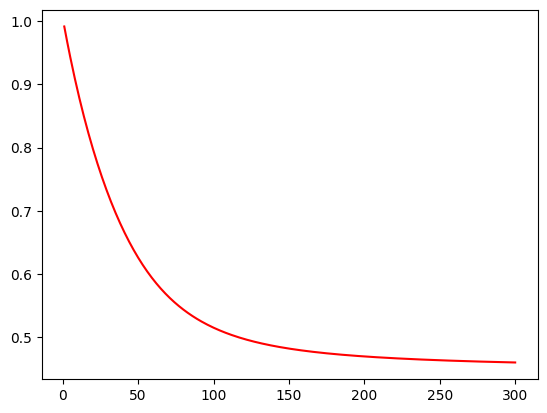

In [30]:
plt.plot(list(range(1,301)),j_history,color = 'red')


<AxesSubplot: >

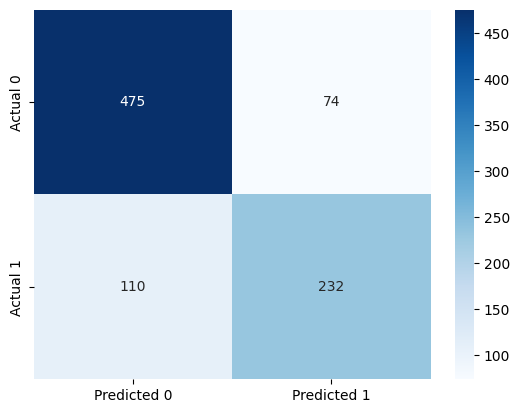

In [38]:
conf_mat = pd.DataFrame(columns = ['Predicted 0','Predicted 1'],index = ['Actual 0','Actual 1'], data = [[0,0],[0,0]])
predicted = result(x_train,f_theta)
for i in range(len(y_train)):
    if y_train[i][0] == 0:
        if predicted[i] == 0:
            conf_mat.iloc[0,0] += 1
        else:
            conf_mat.iloc[0,1] += 1
    else:
        if predicted[i] == 0:
            conf_mat.iloc[1,0] += 1
        else:
            conf_mat.iloc[1,1] += 1
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')

In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
test_data['Sex'] = test_data['Sex'].apply(lambda x: 1 if x=='female' else 0)

In [ ]:
test_data['relatives'] = test_data['SibSp'] + test_data['Parch']

In [ ]:
test_data.drop(['SibSp','Parch'],axis = 1,inplace=True)

In [ ]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,relatives
0,892,3,"Kelly, Mr. James",0,34.5,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,3101298,12.2875,NaN,S,2


In [ ]:
test_data['Age'].fillna(0,inplace=True)

In [ ]:
x_test = test_data[['Pclass','Sex','Age','Fare','relatives']]

In [ ]:
x_test = np.array(x_test).reshape(-1,5)

In [ ]:
x_test.shape

(418, 5)

In [ ]:
x_test = scaler.fit_transform(x_test)

In [ ]:
x_test = np.concatenate((np.ones((418,1)),x_test),axis=1)

In [ ]:
x_test

array([[ 1.        ,  0.87348191, -0.75592895,  0.59480137, -0.49781052,
        -0.5534426 ],
       [ 1.        ,  0.87348191,  1.32287566,  1.30589556, -0.51265996,
         0.10564289],
       [ 1.        , -0.31581919, -0.75592895,  2.15920859, -0.46453181,
        -0.5534426 ],
       ...,
       [ 1.        ,  0.87348191, -0.75592895,  0.82235151, -0.50818292,
        -0.5534426 ],
       [ 1.        ,  0.87348191, -0.75592895, -1.3678186 , -0.4938564 ,
        -0.5534426 ],
       [ 1.        ,  0.87348191, -0.75592895, -1.3678186 , -0.23762123,
         0.76472838]])

In [ ]:
result_y = result(x_test,f_theta)

In [ ]:
result_y = result_y.reshape(-1,1)

In [ ]:
result_passengerid = np.array(test_data['PassengerId']).reshape(-1,1)

In [ ]:
result_matrix = np.concatenate((result_passengerid,result_y),axis=1)

In [ ]:
result_df = pd.DataFrame(result_matrix,columns=['PassengerId','Survived'])

In [ ]:
result_df.to_csv('send_result',index=False)